# Apple Stock

### Step 1.필요한 librarie들을 import 하세요

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

### Step 2. 다음과 같은 DataSet을 import 하세요 [address](https://raw.githubusercontent.com/myoh0623/dataset/main/appl_1980_2014.csv)

In [2]:
url = 'https://raw.githubusercontent.com/myoh0623/dataset/main/appl_1980_2014.csv'

### Step 3. apple 라는 변수에 DataFrame을 할당 하세요

In [4]:
apple = pd.read_csv(url)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4. 각 column들의 data type을 확인하세요

In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Date column을 datetime type으로 변경하세요

In [6]:
apple.Date = pd.to_datetime(apple.Date)

### Step 6. Date column을 index로 설정하세요

In [8]:
apple = apple.set_index("Date")
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7. 중복된 date가 존재 하는지 확인하세요

In [52]:
apple.index.is_unique

True

### Step 8. index를 오름차순으로 정렬하세요.

In [19]:
apple.sort_index(ascending=True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. 매월 마지막 영업일 가져오세요 (business day of each month)

In [26]:
apple_m = apple.resample("M").last()
apple_m.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-31,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-28,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44


### Step 10. 주가가 등록된 첫날과 마지막 날의 차이는 몇일인가요?

In [53]:
apple.index.max() - apple.index.min()

Timedelta('12261 days 00:00:00')

### Step 11. 영업달 기준으로 몇달간의 데이터가 저장되어있나요?

In [54]:
len(apple.resample("M"))

404

In [28]:
apple_m.index.value_counts

<bound method IndexOpsMixin.value_counts of DatetimeIndex(['1980-12-31', '1981-01-31', '1981-02-28', '1981-03-31',
               '1981-04-30', '1981-05-31', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31',
               '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31',
               '2014-06-30', '2014-07-31'],
              dtype='datetime64[ns]', name='Date', length=404, freq='M')>

### Step 12. 'Adj Close'값을 이용해 종가 그래프를 그려보세요
- `plt.plot`
- 코드를 강사와 공유해 보세요

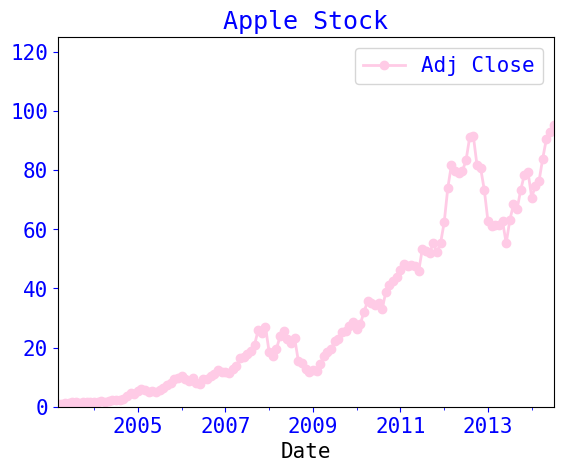

In [73]:
from datetime import datetime
apple_stock = apple_m.plot( y="Adj Close",marker="o", color = "#ffcbe6")
plt.title("Apple Stock")
apple_stock.set_xlim(datetime(2003,3,31), datetime(2014,7,31))       
apple_stock.set_ylim([0, 125])   
plt.show()

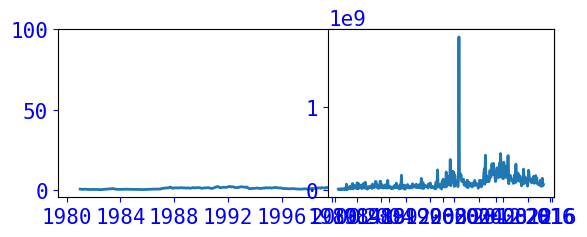

In [74]:
fig = plt.figure()

ax_1 = fig.add_subplot(2,1,1)
ax_1.plot(apple_m.index, apple_m["Adj Close"])

ax_2 = fig.add_subplot(2,2,2)
ax_2.plot(apple_m.index, apple_m["Volume"])


fig.set_size_inches
plt.show()